## Import

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.metrics import  silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import mplcursors

import pandas as pd 
import matplotlib.pyplot as plt 
import squarify 
import seaborn as sns
import numpy as np

%matplotlib inline

## Đọc file csv

In [4]:
data_type = {
    '_CustomerID': str 
}

sales_data = pd.read_csv('./sales_data.csv', dtype=data_type, parse_dates=['OrderDate'])

In [5]:
sales_data.describe()

,OrderDate,_SalesTeamID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
count,7991,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,2019-09-15 11:01:09.828557312,14.384307,183.850081,23.771743,4.525341,0.114394,2284.536504,1431.911054
min,2018-05-31 00:00:00,1.000000,1.000000,1.000000,1.000000,0.050000,167.500000,68.675000
25%,2019-01-16 12:00:00,8.000000,91.000000,12.000000,3.000000,0.050000,1031.800000,606.115500
50%,2019-09-15 00:00:00,14.000000,183.000000,24.000000,5.000000,0.075000,1849.200000,1080.576000
75%,2020-05-12 00:00:00,21.000000,276.000000,36.000000,7.000000,0.150000,3611.300000,2040.250500
max,2020-12-30 00:00:00,28.000000,367.000000,47.000000,8.000000,0.400000,6566.000000,5498.556000
std,NaN,7.986086,105.903946,13.526545,2.312631,0.085570,1673.096364,1112.413043


In [6]:
df = sales_data.copy()
df['Revenue'] = (df['Unit Price'] - (df['Unit Price'] * df['Discount Applied']) - df['Unit Cost']) * df['Order Quantity']

columns = ['OrderNumber', '_CustomerID', 'OrderDate', 'Revenue']
df_dataset = df[columns]

today_date = pd.to_datetime('2021-01-01')

rfm_dataset = df_dataset.groupby('_CustomerID').agg ({
    'OrderDate' : lambda v : (today_date - v.max()).days,
    'OrderNumber' : 'count',
    'Revenue' : 'sum'
})

rfm_dataset.rename(
    columns= {
        'OrderDate' : 'Recency',
        'OrderNumber' : 'Frequency',
        'Revenue' : 'Monetary'
    }, 
    inplace= True 
)

r = pd.qcut(rfm_dataset['Recency'], q = 5, labels=range(5,0,-1))
f = pd.qcut(rfm_dataset['Frequency'], q = 5, labels=range(1,6))
m = pd.qcut(rfm_dataset['Monetary'], q = 5, labels=range(1,6))

def segment(value):
	if value == '555' or value == '554'  or value == '544' or value == '545' or value == '454' or value == '455' or value == '445':
		return 'Champions'
	elif value == '543' or  value == '444' or value == '435' or value == '355' or value == '354' or value == '345' or value == '344' or value == '335':
		return 'Loyal'
	elif value == '553' or  value == '551' or value == '552' or value == '541' or value == '542' or value == '533' or value == '532' or value == '531' or value == '452' or  value == '451' or value == '442' or value == '441' or value == '431' or value == '453' or value == '433' or value == '432' or value == '423' or  value == '353' or value == '352' or value == '351' or value == '342' or value == '341' or value == '333' or value == '323':
		return 'Potential Loyalist'
	elif value == '512' or  value == '511' or value == '422' or value == '421' or value == '412' or value == '411' or value == '311':
		return 'New Customers'
	elif value == '525' or  value == '524' or value == '523' or value == '522' or value == '521' or value == '515' or value == '514' or value == '513' or value == '425' or  value == '424' or value == '413' or value == '414' or value == '415' or value == '315' or value == '314' or value == '313':
		return 'Promising'
	elif value == '535' or  value == '534' or value == '443' or value == '434' or value == '343' or value == '334' or value == '325' or value == '324':
		return 'Need Attention'
	elif value == '331' or  value == '321' or value == '312' or value == '221' or value == '213' or value == '231' or value == '241' or value == '251':
		return 'About To Sleep'
	elif value == '255' or  value == '254' or value == '245' or value == '244' or value == '253' or value == '252' or value == '243' or value == '242' or value == '235' or  value == '234' or value == '225' or value == '224' or value == '153' or value == '152' or value == '145' or value == '143' or value == '142' or  value == '135' or value == '134' or value == '133' or value == '125' or value == '124':
		return "At Risk"
	elif value == '155' or  value == '154' or value == '144' or value == '214' or value == '215' or value == '115' or value == '114' or value == '113':
		return 'Cannot Lose Them'
	elif value == '332' or  value == '322' or value == '233' or value == '232' or value == '223' or value == '222' or value == '132' or value == '123' or value == '122' or value == '212' or value == '211':
		return 'Hibernating Customers'
	else: 
		return 'Lost Customers'  

In [7]:
rfm_dataset

,Recency,Frequency,Monetary
_CustomerID,,,
1,9,152,335933.6115
10,15,158,435122.1870
11,6,178,487614.2415
12,3,210,616719.2550
13,4,171,441003.2795
14,5,157,381450.0280
15,4,142,441668.3550
16,3,135,402938.7705
17,6,175,534027.3860


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15008\3217253163.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_dataset['Recency'], ax = ax[0])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15008\3217253163.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_dataset['Frequency'], ax = ax[

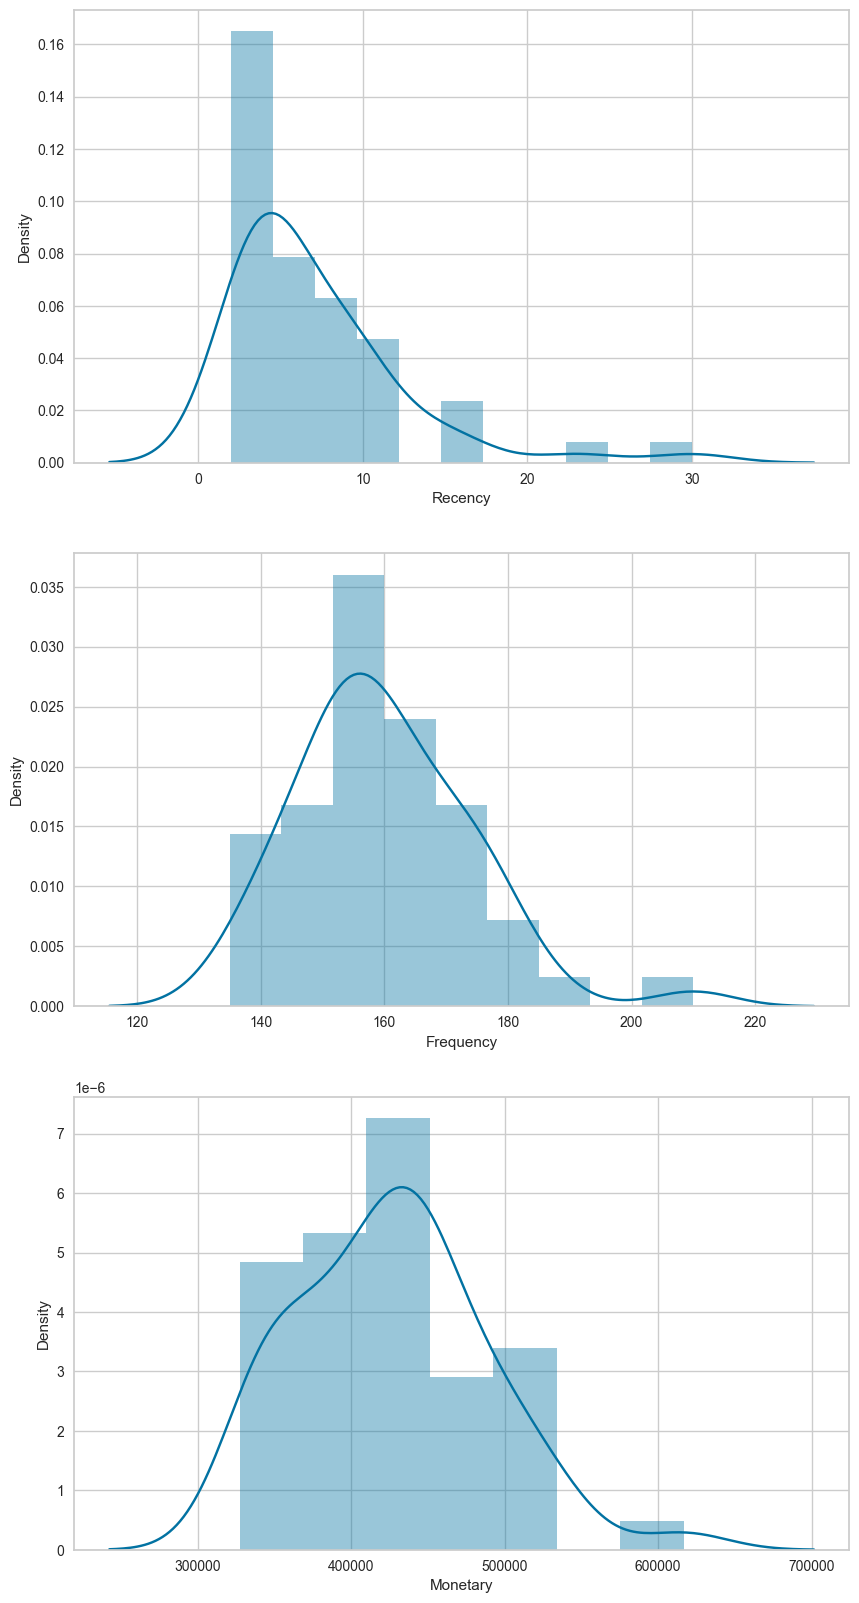

In [8]:
fig, ax = plt.subplots(3,1, figsize=(10,20))
sns.distplot(rfm_dataset['Recency'], ax = ax[0])
sns.distplot(rfm_dataset['Frequency'], ax = ax[1])
sns.distplot(rfm_dataset['Monetary'], ax = ax[2])
plt.show()

In [9]:
# Tạo cột mới, sử dụng phương thức assign()
rfm = rfm_dataset.assign(R=r.values, F=f.values, M=m.values) 
rfm['rfm_group'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)    
rfm['Class']=rfm['rfm_group'].apply(segment)

In [10]:
rfm

,Recency,Frequency,Monetary,R,F,M,rfm_group,Class
_CustomerID,,,,,,,,
1,9,152,335933.6115,2,2,1,221,About To Sleep
10,15,158,435122.1870,1,3,3,133,At Risk
11,6,178,487614.2415,3,5,5,355,Loyal
12,3,210,616719.2550,5,5,5,555,Champions
13,4,171,441003.2795,4,4,3,443,Need Attention
14,5,157,381450.0280,3,3,2,332,Hibernating Customers
15,4,142,441668.3550,4,1,4,414,Promising
16,3,135,402938.7705,5,1,2,512,New Customers
17,6,175,534027.3860,3,5,5,355,Loyal


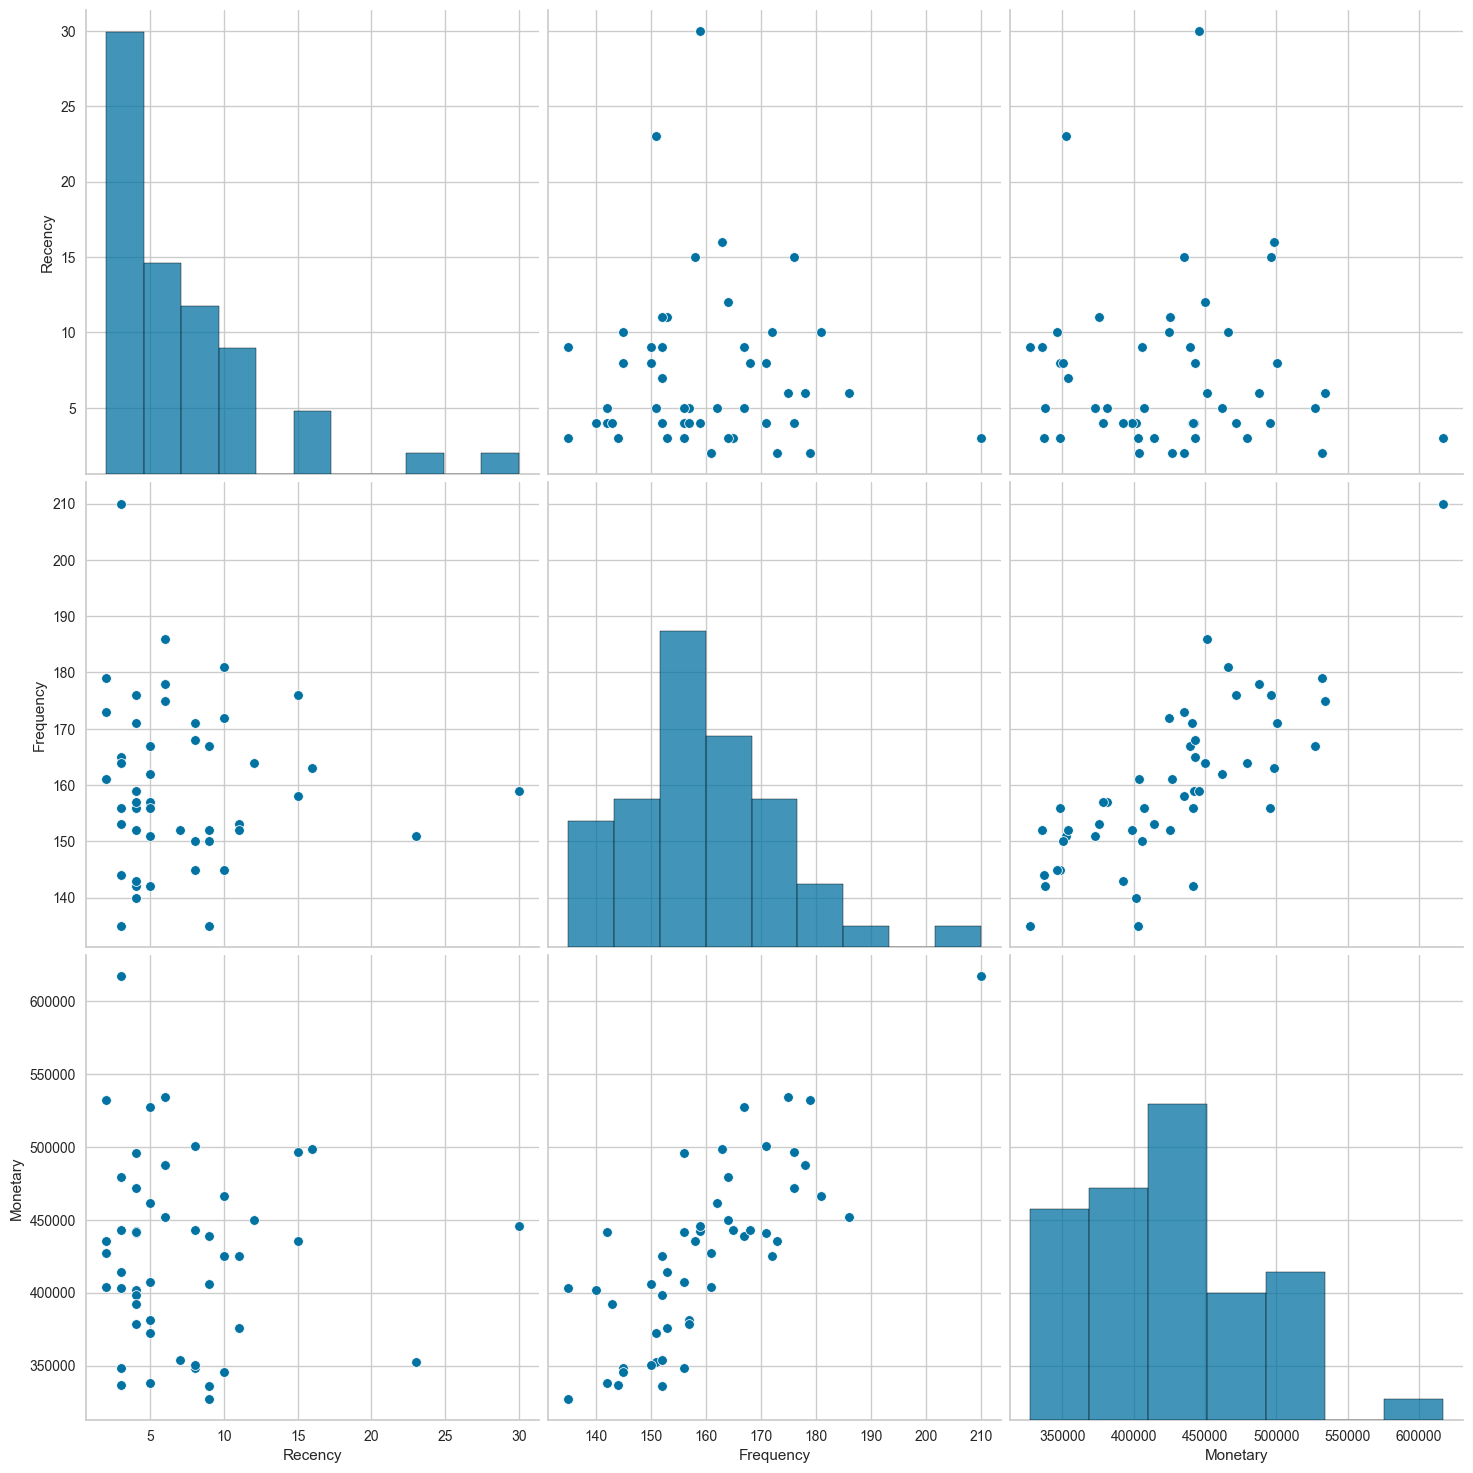

In [11]:
sns.pairplot(rfm[['Recency','Frequency','Monetary']], height=5)

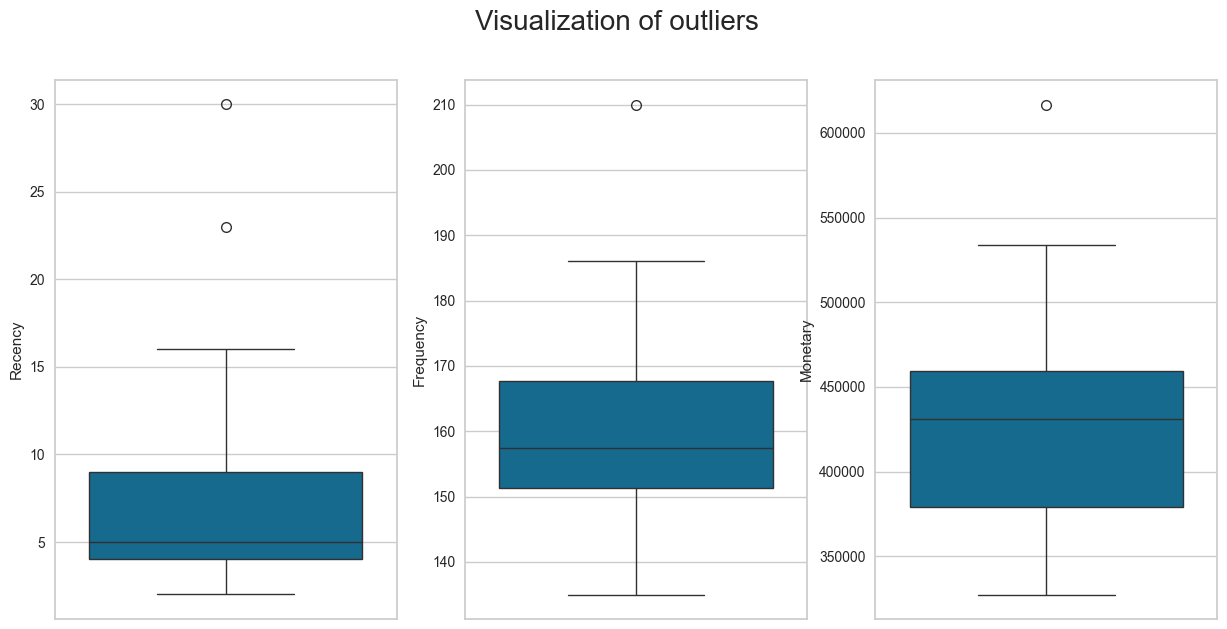

In [12]:
fig = plt.figure(figsize = (15,7))
fig.suptitle("Visualization of outliers",size=20)

axes = fig.add_subplot(1, 3, 1)
sns.boxplot(data=rfm,y="Recency")

axes = fig.add_subplot(1, 3, 2)
sns.boxplot(data=rfm,y="Frequency")

axes = fig.add_subplot(1, 3, 3)
sns.boxplot(data=rfm,y="Monetary")
plt.show()

In [13]:
customer_segment = rfm.groupby('Class').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'] }).round(1)
customer_segment.columns = ['Mean_R','Mean_F','Mean_M','Count']
customer_segment = customer_segment.sort_values(by= 'Count')

In [14]:
customer_segment

,Mean_R,Mean_F,Mean_M,Count
Class,,,,
Lost Customers,23.0,151.0,352505.5,1
About To Sleep,8.0,152.0,345047.5,2
Cannot Lose Them,13.5,170.0,473100.5,2
Need Attention,4.0,165.0,441687.8,2
Promising,3.5,151.8,424869.4,4
Champions,3.0,178.8,508542.6,5
Loyal,5.6,173.6,492372.5,5
New Customers,3.8,142.7,378396.4,6
Potential Loyalist,3.2,160.7,415474.1,6


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15008\485670957.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y="Class", data=rfm, palette="Set3")


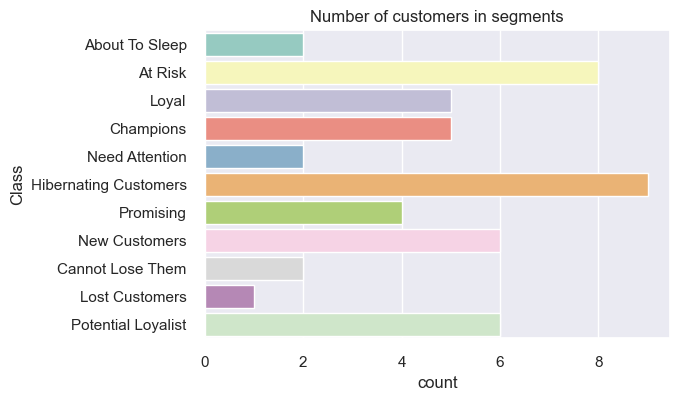

In [15]:
sns.set(style="darkgrid", rc={'figure.figsize': (6, 4)})
ax = sns.countplot(y="Class", data=rfm, palette="Set3")
ax.set_title('Number of customers in segments')
plt.show()

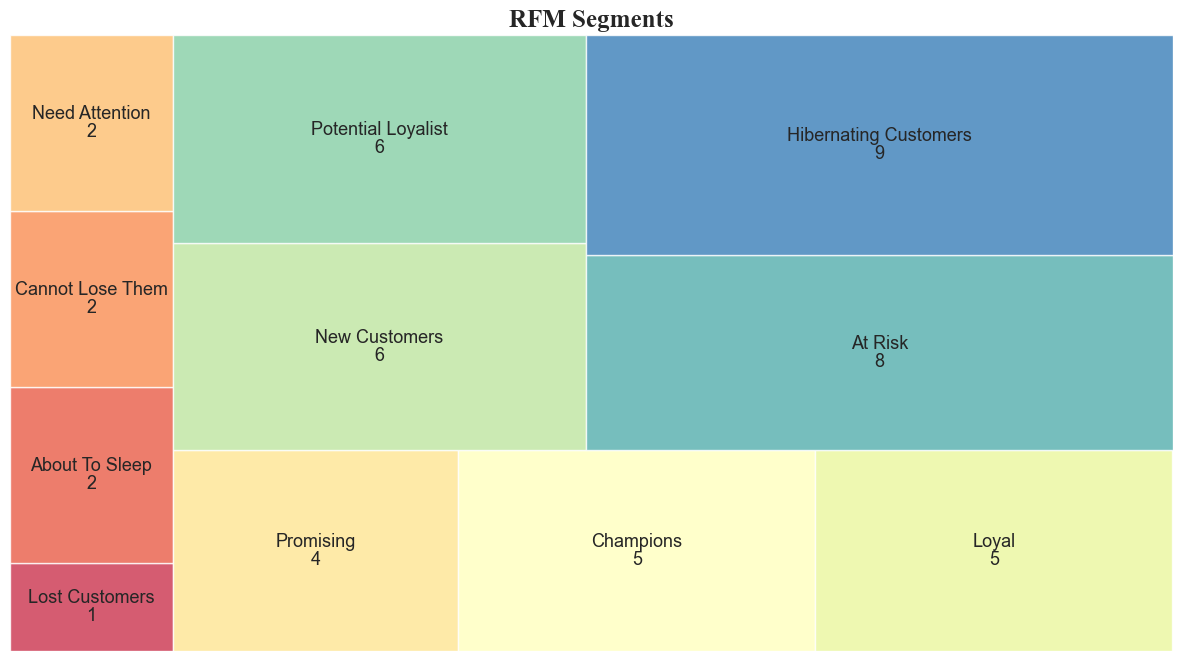

In [16]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15, 8)
squarify.plot(sizes=customer_segment.Count, 
              label=customer_segment.index,
              value=customer_segment.Count,
              alpha=0.8,
              text_kwargs={'fontsize': 13},
              color=sns.color_palette("Spectral", len(customer_segment.index)))
plt.title("RFM Segments",fontsize=18,fontweight="bold",fontfamily='Times New Roman')
plt.axis('off')
plt.show()

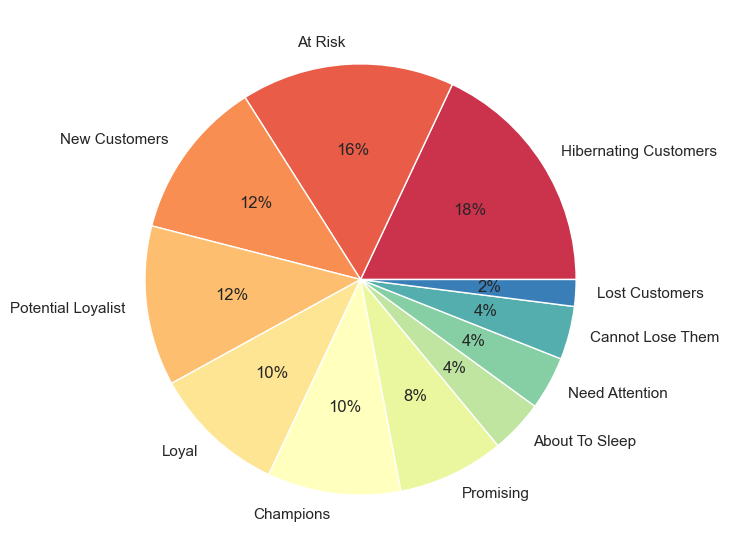

In [17]:
plt.figure(figsize = (7,7))
plt.pie(rfm.Class.value_counts(),
        labels=rfm.Class.value_counts().index,
        autopct='%.0f%%',
        colors=sns.color_palette("Spectral", len(customer_segment.index)))
plt.show()

In [18]:
rfm1 = rfm[['Recency','Frequency','Monetary', 'Class']]
rfm1


,Recency,Frequency,Monetary,Class
_CustomerID,,,,
1,9,152,335933.6115,About To Sleep
10,15,158,435122.1870,At Risk
11,6,178,487614.2415,Loyal
12,3,210,616719.2550,Champions
13,4,171,441003.2795,Need Attention
14,5,157,381450.0280,Hibernating Customers
15,4,142,441668.3550,Promising
16,3,135,402938.7705,New Customers
17,6,175,534027.3860,Loyal


In [19]:
rfm_final = pd.DataFrame()
rfm_final['Class'] = rfm1['Class']
rfm_final['Recency'] = stats.boxcox(rfm1['Recency'])[0]
rfm_final['Frequency'] = stats.boxcox(rfm1['Frequency'])[0]
rfm_final['Monetary'] = pd.Series(np.cbrt(rfm1['Monetary'])).values
rfm_final

,Class,Recency,Frequency,Monetary
_CustomerID,,,,
1,About To Sleep,1.671489,0.566399,69.515954
10,At Risk,1.940735,0.566404,75.776942
11,Loyal,1.430652,0.566418,78.709193
12,Champions,0.954935,0.566433,85.119521
13,Need Attention,1.162885,0.566414,76.116815
14,Hibernating Customers,1.313753,0.566403,72.523577
15,Promising,1.162885,0.566389,76.155059
16,New Customers,0.954935,0.566380,73.860632
17,Loyal,1.430652,0.566416,81.131189


In [20]:
numerical_columns = rfm_final[['Recency', 'Frequency', 'Monetary']]

std_scaler = StandardScaler()


df_scaled = std_scaler.fit_transform(numerical_columns)


df_scaled = pd.DataFrame(df_scaled, columns=numerical_columns.columns)

In [21]:
df_scaled

,Recency,Frequency,Monetary
0,0.766226,-0.496835,-1.570399
1,1.449556,-0.015878,0.188949
2,0.154997,1.274313,1.012916
3,-1.052342,2.668860,2.814229
4,-0.524577,0.869959,0.284454
5,-0.141686,-0.092520,-0.725252
6,-0.524577,-1.426199,0.295200
7,-1.052342,-2.192545,-0.349537
8,0.154997,1.106491,1.693501
9,0.154997,1.685724,0.455016


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

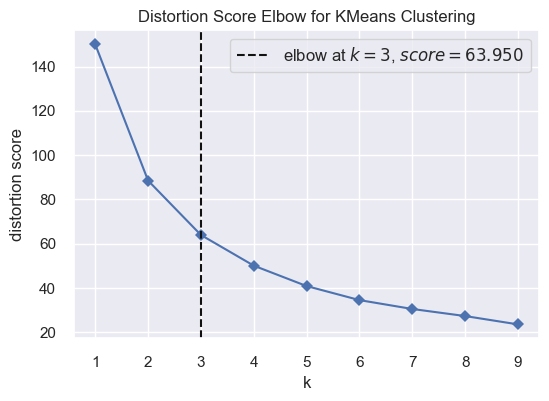

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings= False)
visualizer.fit(df_scaled)        
visualizer.show() 

In [23]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(df_scaled)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Recency,Frequency,Monetary
0,0.937861,0.719751,0.639827
1,0.069201,-0.886310,-0.922752
2,-0.972219,0.569066,0.694680


In [24]:
df_new = rfm1.assign(Cluster = cluster_labels)

In [25]:
df_new

,Recency,Frequency,Monetary,Class,Cluster
_CustomerID,,,,,
1,9,152,335933.6115,About To Sleep,1
10,15,158,435122.1870,At Risk,0
11,6,178,487614.2415,Loyal,0
12,3,210,616719.2550,Champions,2
13,4,171,441003.2795,Need Attention,2
14,5,157,381450.0280,Hibernating Customers,1
15,4,142,441668.3550,Promising,1
16,3,135,402938.7705,New Customers,1
17,6,175,534027.3860,Loyal,0


In [26]:
df_result = df_new.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(2)
df_result

Recency Frequency   Monetary      
           mean      mean       mean count
Cluster                                   
0         11.57    169.29  464086.61    14
1          6.81    148.00  371264.65    21
2          3.33    167.53  468770.46    15

<Axes: xlabel='Cluster', ylabel='Monetary'>

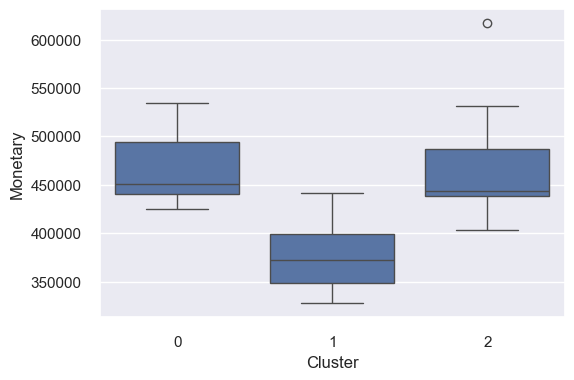

In [27]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster', y='Monetary', data=df_new)

<Axes: xlabel='Cluster', ylabel='Frequency'>

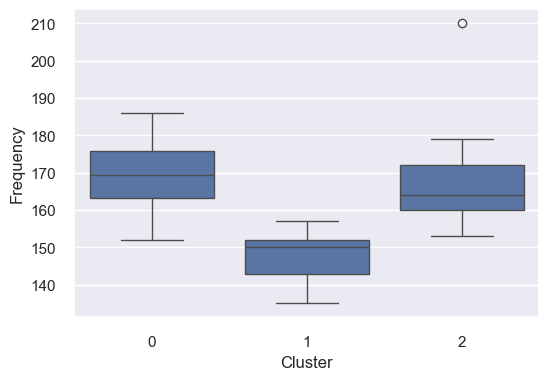

In [28]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster', y='Frequency', data=df_new)

<Axes: xlabel='Cluster', ylabel='Recency'>

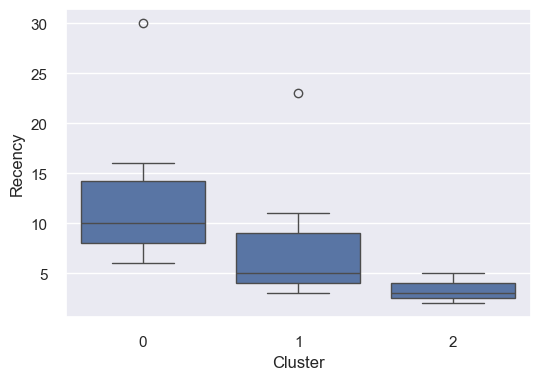

In [29]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster', y='Recency', data=df_new)

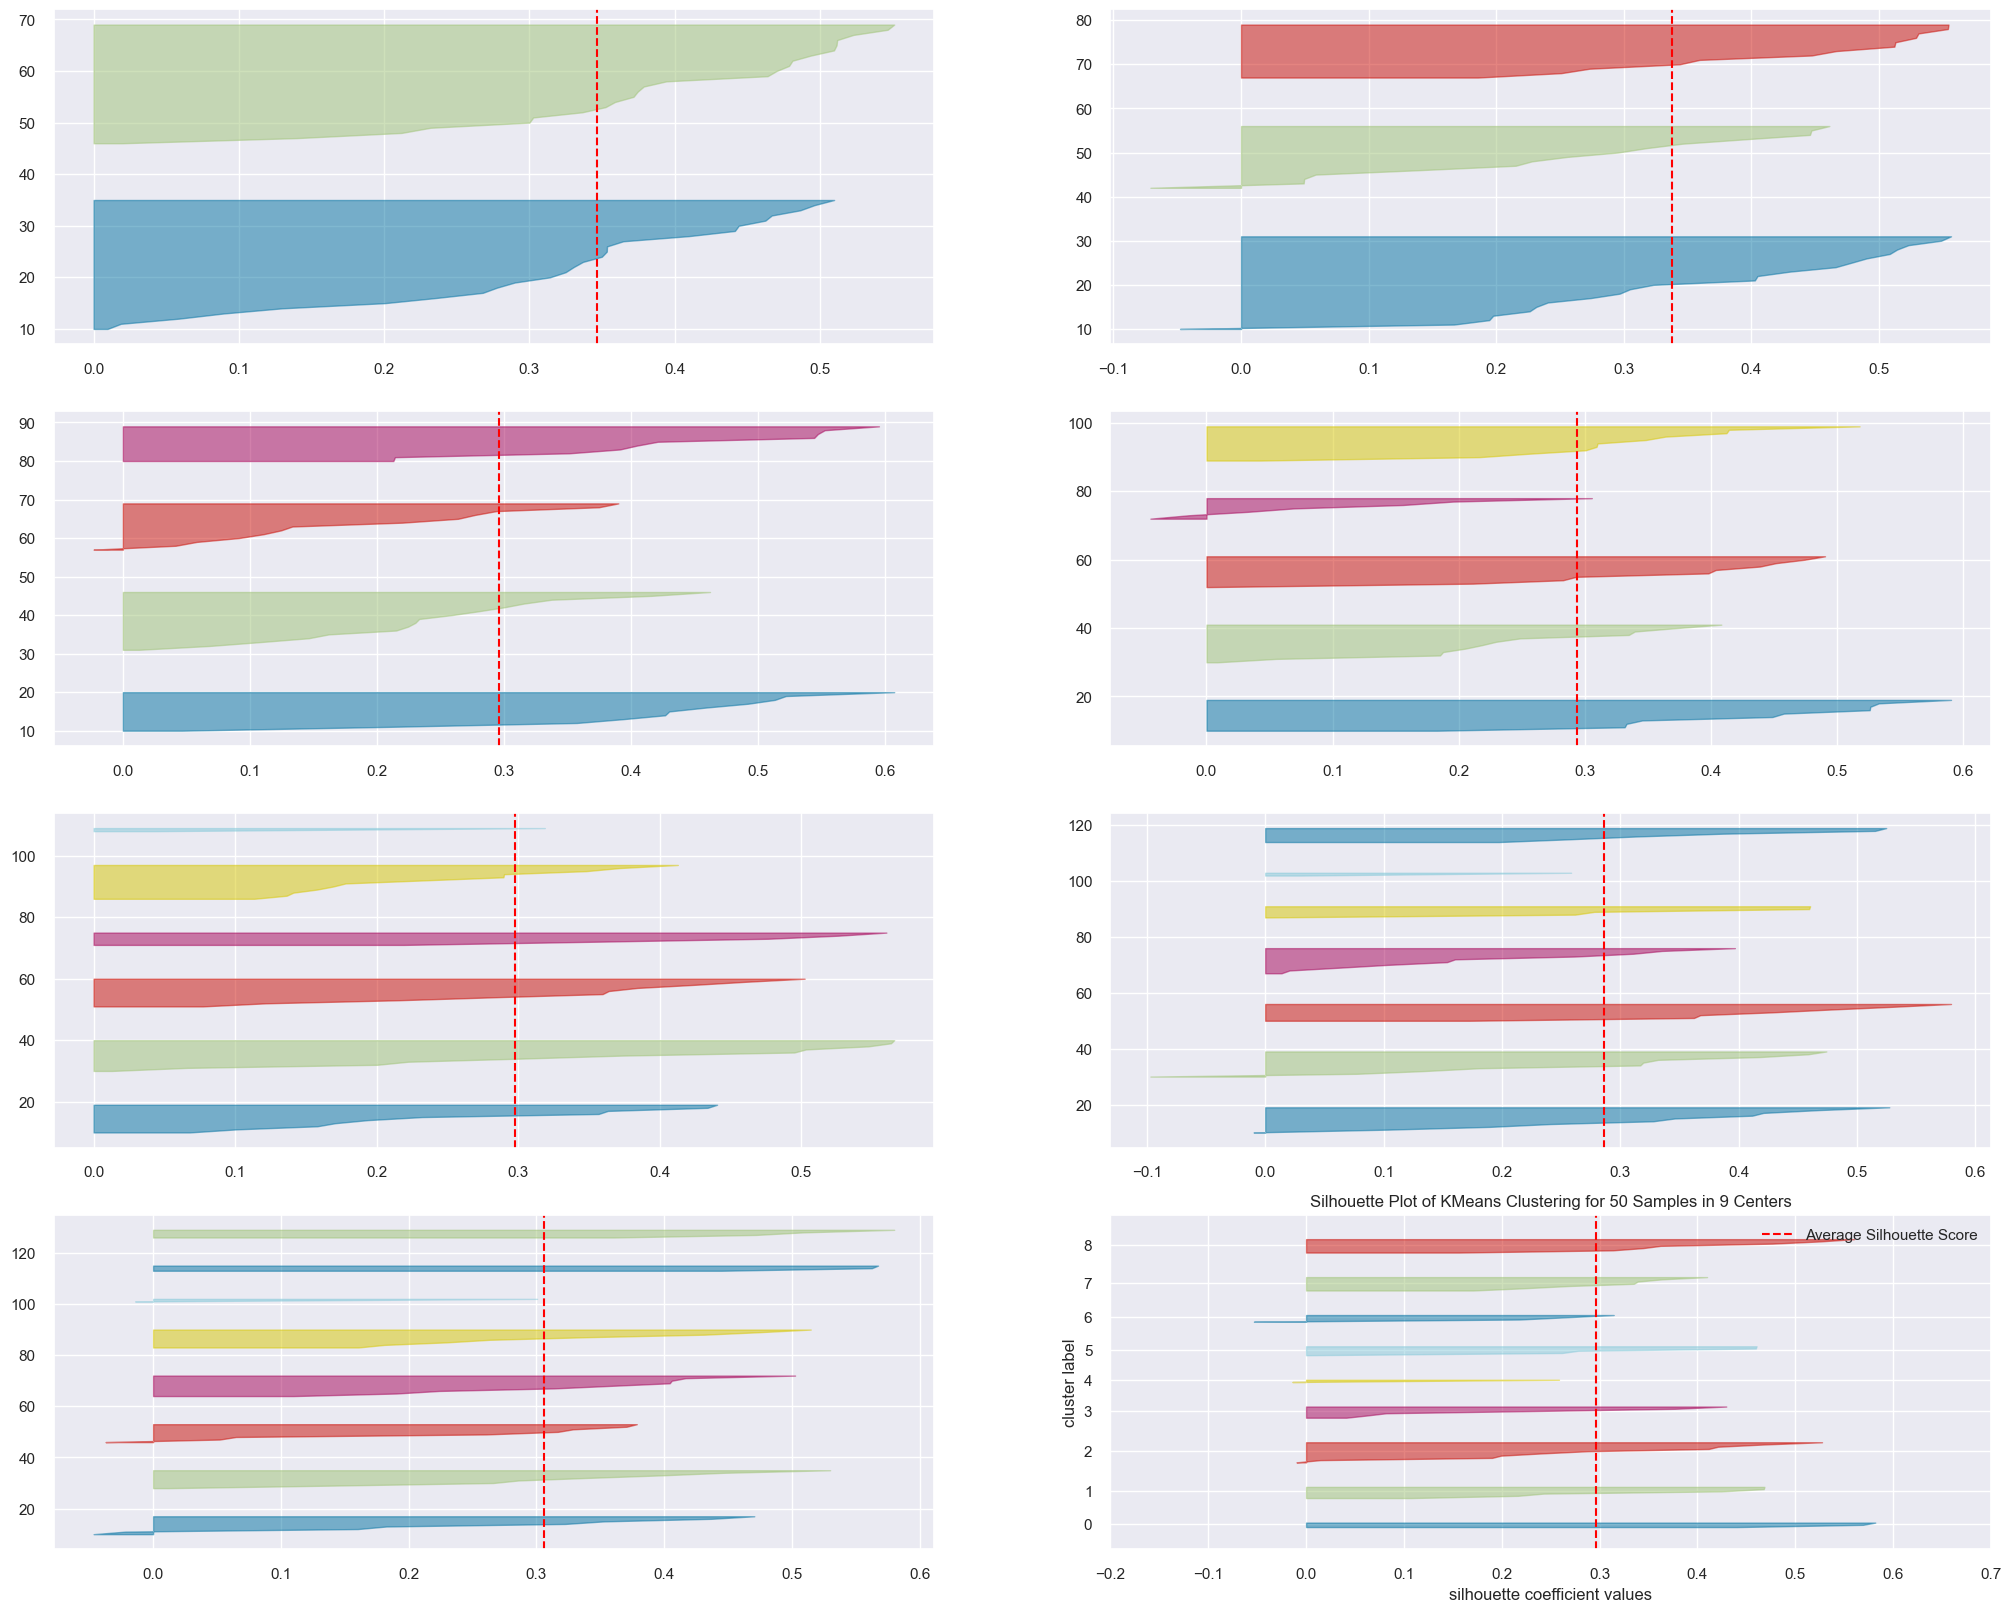

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 50 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
#silhouette
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(25,20))
for k in [2, 3, 4, 5, 6, 7, 8, 9]:

    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_scaled)

visualizer.show()

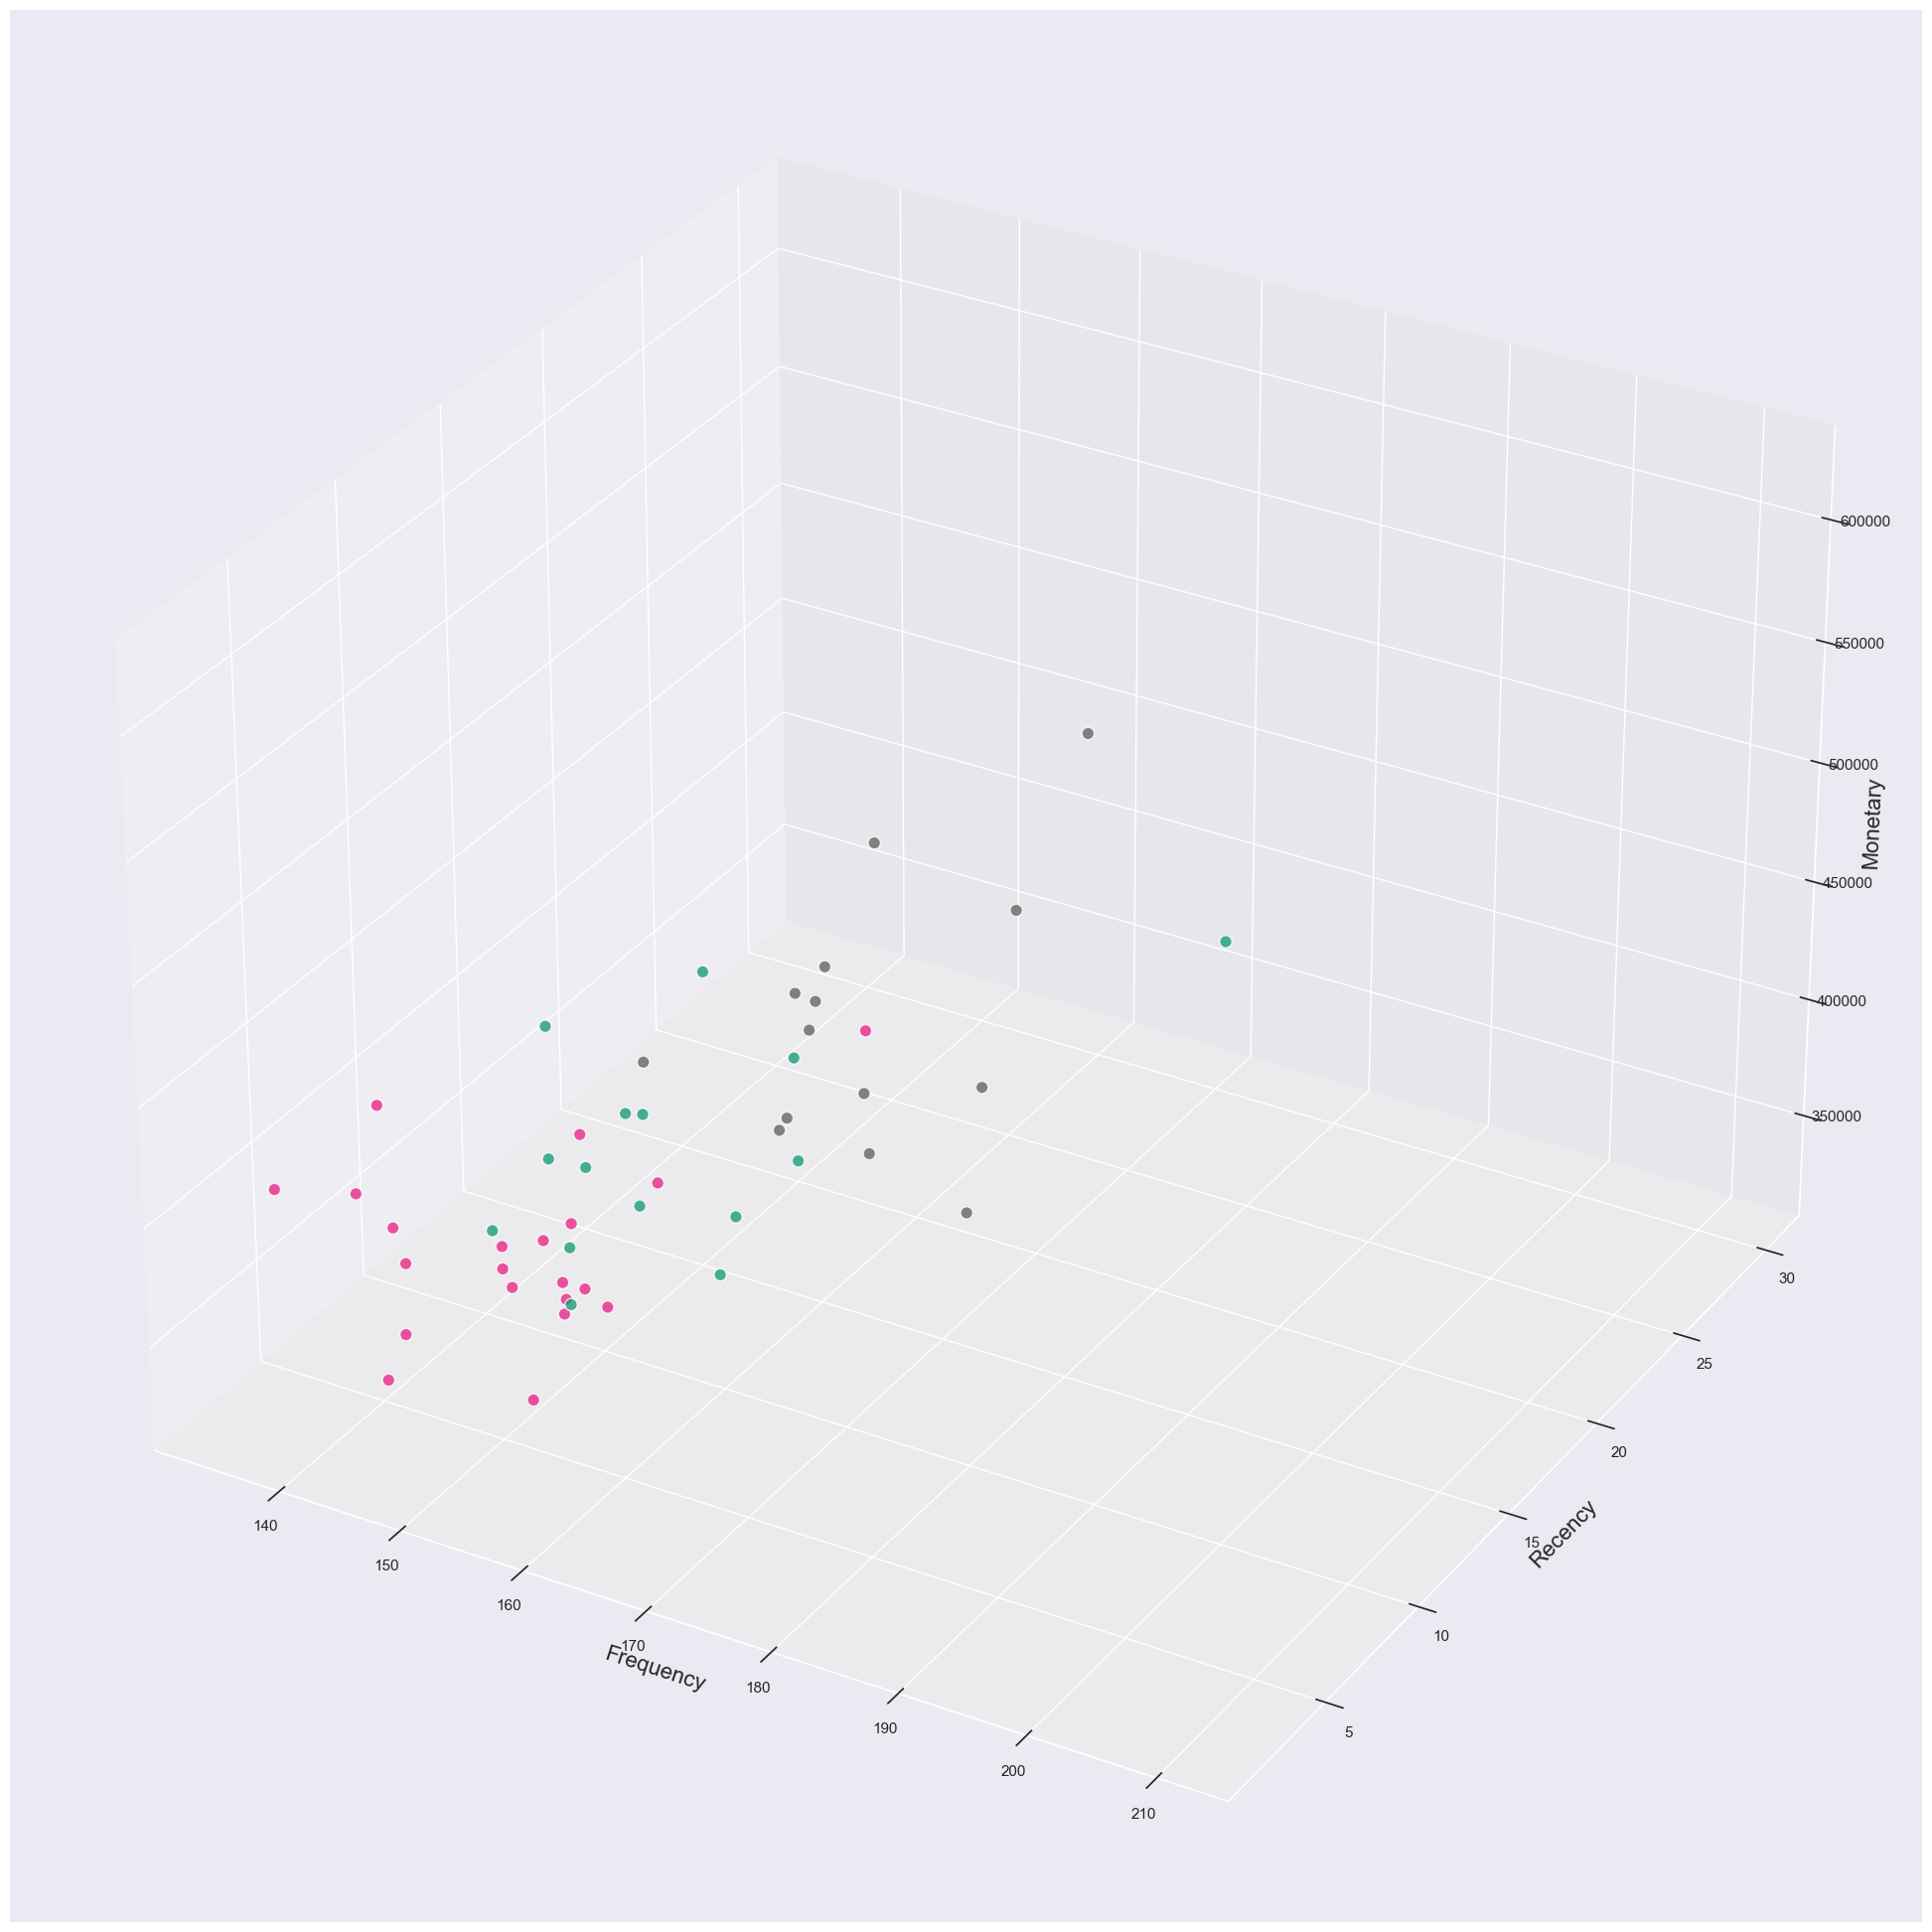

In [31]:
plt.rcParams['figure.figsize'] = (25, 25)
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_new['Frequency'], df_new['Recency'], df_new['Monetary'],
                     c=df_new['Cluster'],
                     s=80,
                     cmap='Dark2_r',
                     alpha=0.8,
                     edgecolor='white')
ax.set_xlabel('Frequency', fontsize=16)
ax.set_ylabel('Recency', fontsize=16)
ax.set_zlabel('Monetary', fontsize=16)

plt.show()

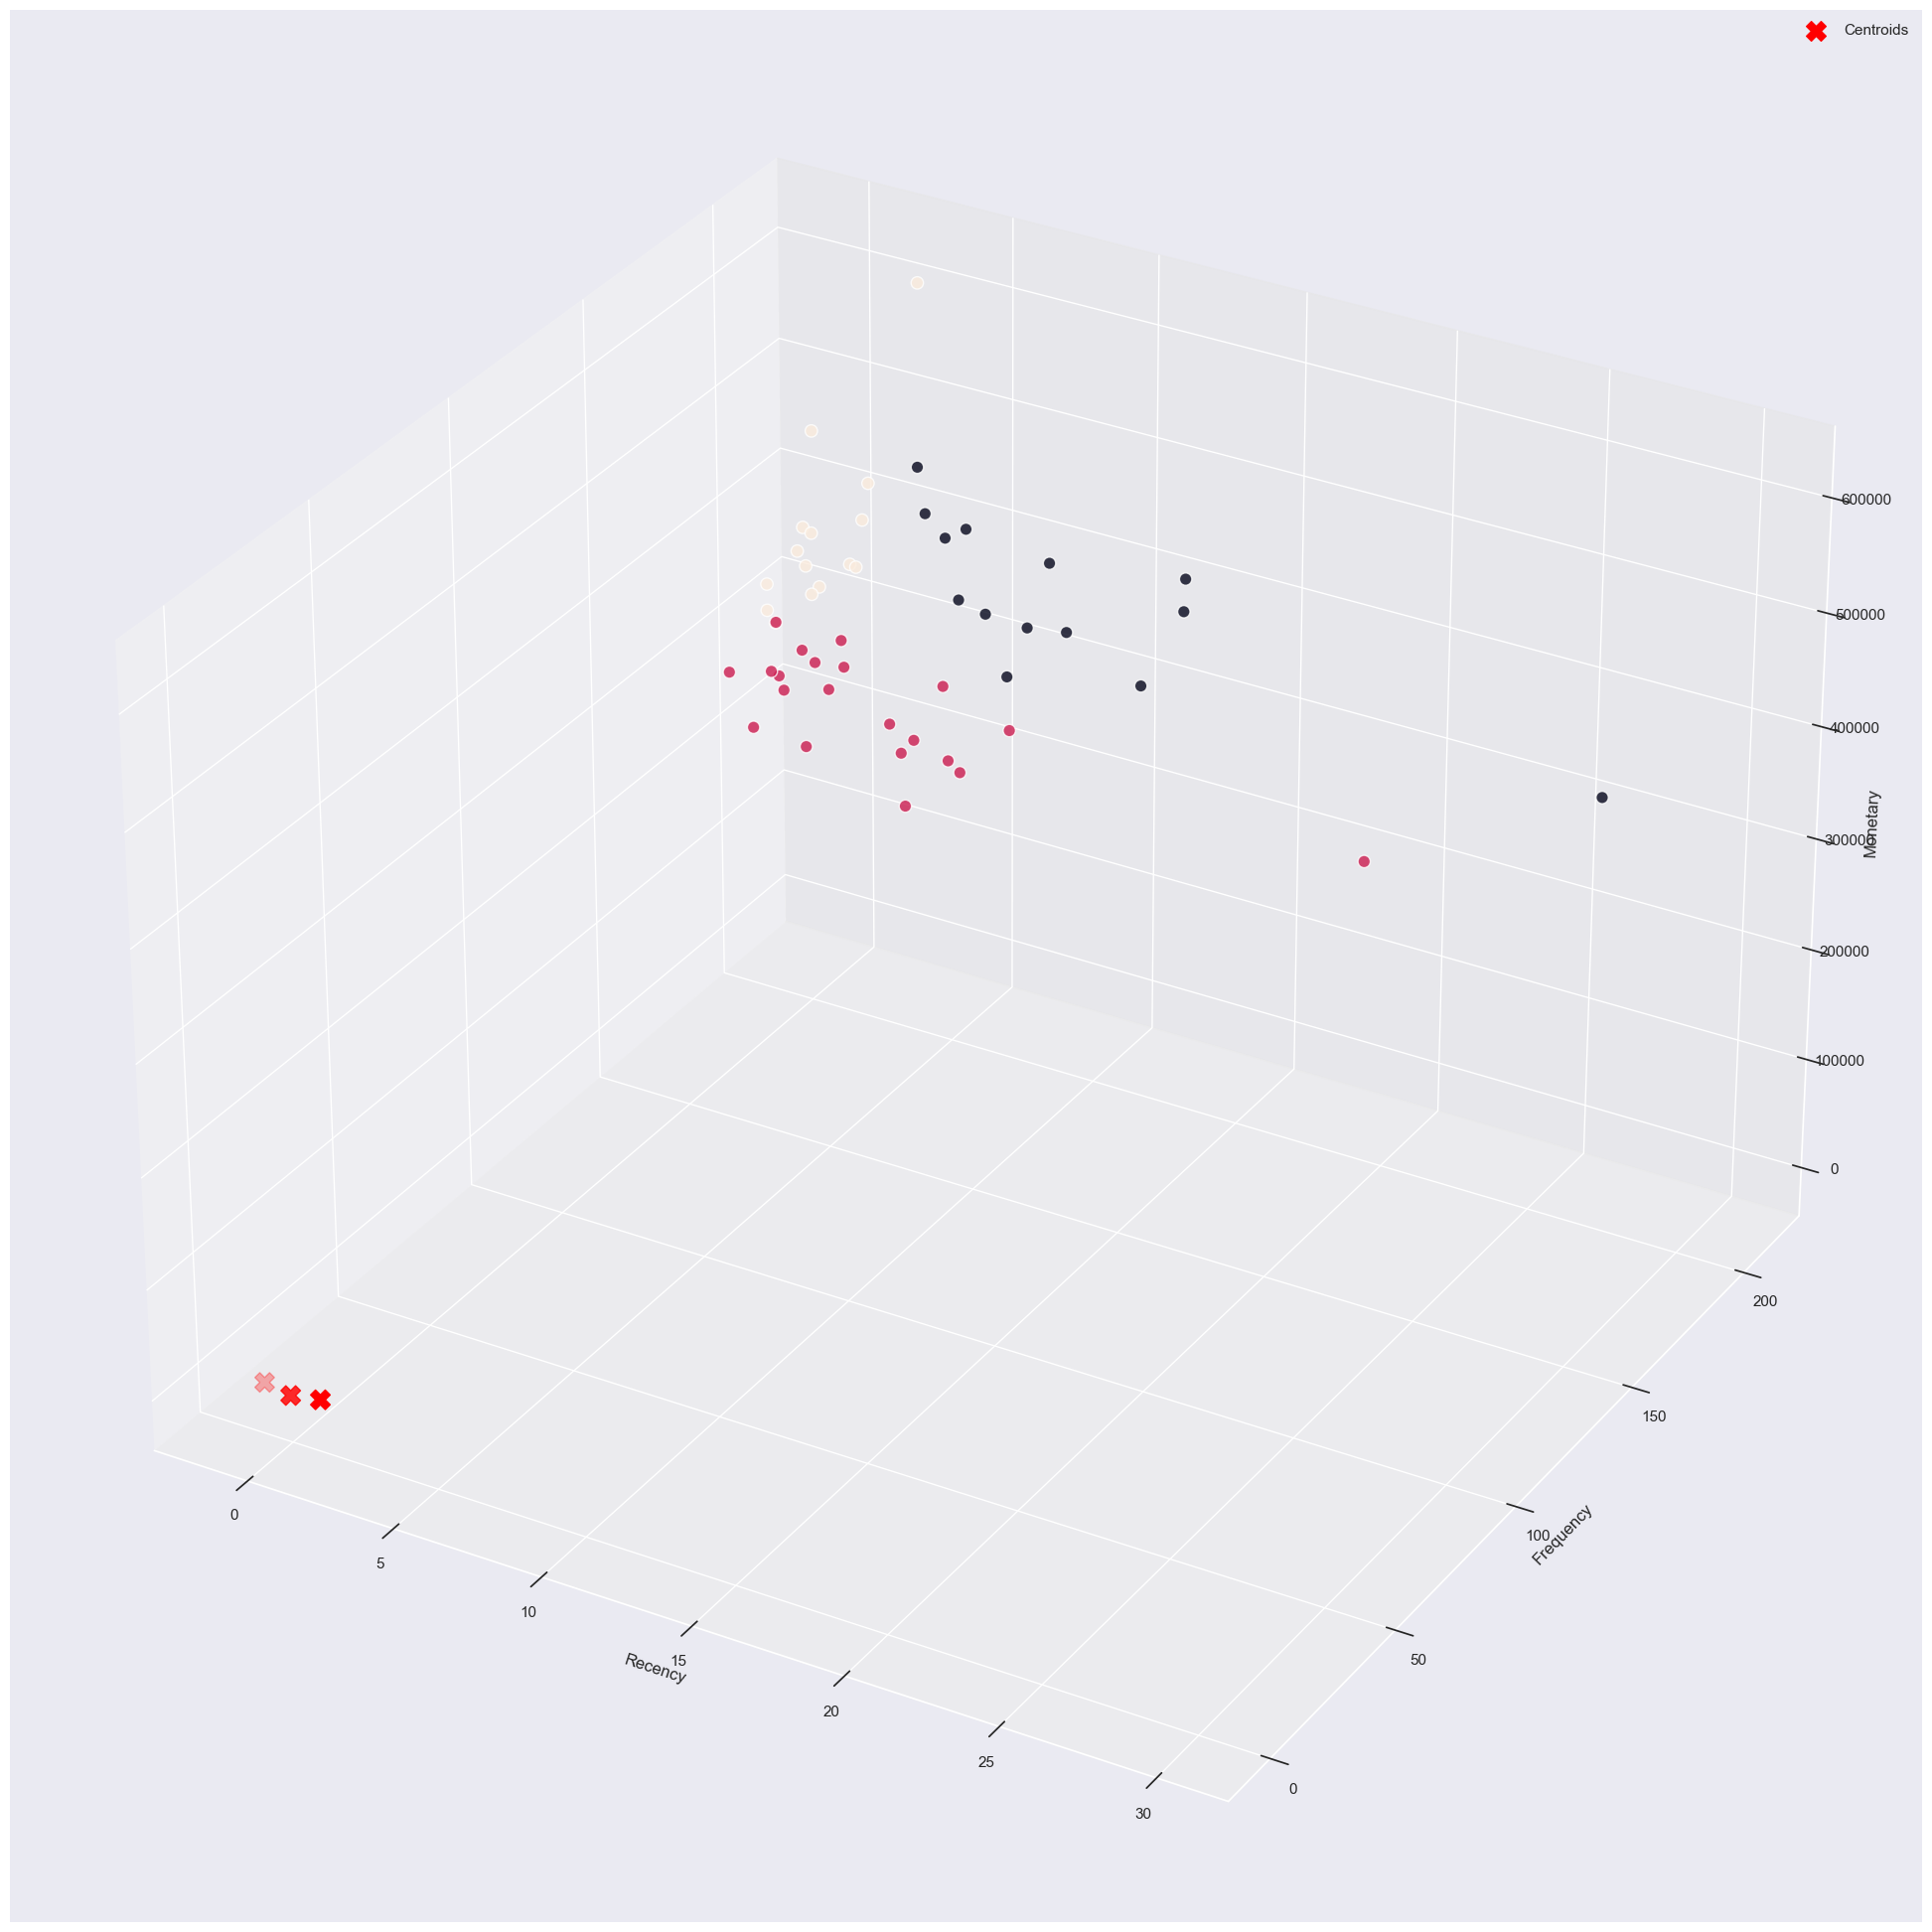

In [32]:
# Tạo biểu đồ 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Lấy dữ liệu từ df_new
cluster_labels = df_new['Cluster']
recency = df_new['Recency']
frequency = df_new['Frequency']
monetary = df_new['Monetary']

# Vẽ biểu đồ 3D cho các điểm dữ liệu
scatter = ax.scatter(recency, frequency, monetary, c=cluster_labels, s=80, alpha=0.8, edgecolor='white')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Vẽ trung tâm cụm
centroid_recency = centroid_df['Recency']
centroid_frequency = centroid_df['Frequency']
centroid_monetary = centroid_df['Monetary']
ax.scatter(centroid_recency, centroid_frequency, centroid_monetary, c='red', marker='X', s=200, label='Centroids')

plt.legend()
plt.show()